Homework 1:
Generate a set of 𝑁 points of the function $sin^2(X)$, between $0$ and $2 \pi$, including an array of 𝑥 positions, 𝑦=𝑓(𝑥) and first derivative 𝑦′=𝑓′(𝑥)

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

Instructions:
Below you will find some examples but try not to use the infamous copy and paste method. Use those as a reference. (Except the hermite polynomial routine (hdiff, hermite) which you can copy and paste)

Useful examples:
use as a reference , $\color{red}{\text{DO NOT COPY &amp; PASTE}}$ (except th Hermite functions - below)

$\color{red}{\text{it's good to remember the most basic elements in Python (memorize how to make a simple plot, create array, import most common libraries) your experience with programming will be better. It's like speaking in foreign language without using the translator all the time.}}$


In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [39]:
#Defino ambas funciones:

def sin2(x):
    '''
    By default, the angle must be in degrees.
    '''
    return (np.sin(x))**2

In [5]:
def fprime(x):
    return np.sin(2*x)

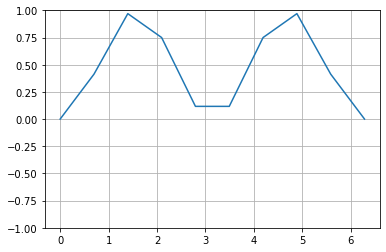

In [29]:
#Graphic
x = np.linspace(0,2*np.pi,10) 
y = sin2(x)

plt.plot(x,y)

plt.ylim(-1,1)
plt.grid()
plt.show()

$Lagrange\ poly\:\$

In [22]:
x = np.linspace(0, 2*np.pi,10)
y = sin2(x)

In [23]:
lagrangepoly1 = interpolate.lagrange(x,y)
lagrangepoly1

poly1d([-1.62630326e-18, -1.25598518e-03,  3.15663505e-02, -3.13492883e-01,
        1.54753814e+00, -3.89900431e+00,  4.56959609e+00, -2.02232705e+00,
        7.84017877e-01,  0.00000000e+00])

$Graphic\$

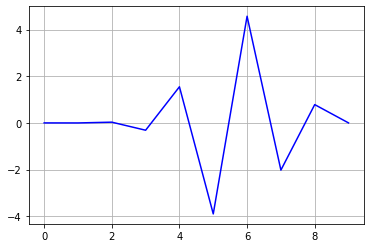

In [28]:
#Graphic

plt.plot(lagrangepoly1,'b')

plt.grid()
plt.show()

$Hermite\$

In [32]:
#Función nuevamente definida

x1 = np.linspace(0,2*np.pi,5) 
y1 = sin2(x)

In [35]:
#Derivada
x2 = np.linspace(0,2*np.pi,5)
y2 = fprime(x1)
Xdata = np.linspace(0,2*np.pi,10,endpoint=True)

In [38]:
#Código implementado por el profesor en clase:

def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
# and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
# differences using derivatives
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum 

#Hinterp = hermite(x, y, yprime, xdata)

In [36]:
Hinterp = hermite(x1, y1, y2, Xdata)
Hinterp

array([0.00000000e+00, 3.53656904e-01, 9.67030597e-01, 7.39905276e-01,
       1.12773247e-01, 1.12773247e-01, 7.39905276e-01, 9.67030597e-01,
       3.53656904e-01, 3.90798505e-14])

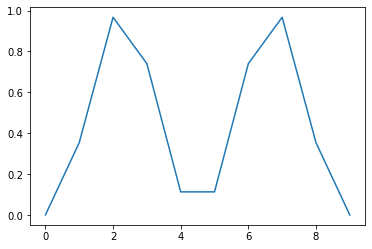

In [37]:
plt.plot(Hinterp)

$Es\ posible\ notar\ que\ aproxima\ mejor\ el\ polinomio\ de\ Hermite\$